# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████| 109248/109248 [02:03<00:00, 885.34it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also
project_data['project_title'].head(2)

0    Educational Support for English Learners at Home
1               Wanted: Projector for Hungry Learners
Name: project_title, dtype: object

In [19]:
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[10])
print("="*50)
print(project_data['project_title'].values[100])
print("="*50)
print(project_data['project_title'].values[1500])
print("="*50)


Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
Reading Changes Lives
21st Century learners, 21st century technology!
Listening Center


In [20]:
preprocessed_titles = []

# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 20315.25it/s]


In [21]:
preprocessed_titles = pd.DataFrame(preprocessed_titles)
project_data['project_title'] = preprocessed_titles
project_data['project_title'].head(10)

0            educational support english learners home
1                     wanted projector hungry learners
2      soccer equipment awesome middle school students
3                               techie kindergarteners
4                               interactive math tools
5    flexible seating mrs jarvis terrific third gra...
6        chromebooks special education reading program
7                                      it 21st century
8                         targeting more success class
9                  just for love reading pure pleasure
Name: project_title, dtype: object

In [22]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [23]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [24]:
project_data['project_title'] = project_data['project_title'].fillna('')

In [25]:
#randomly sampling 50000 points
X_p = project_data[project_data['project_is_approved']==1].sample(frac = 0.4)
X_n = project_data[project_data['project_is_approved']==0].sample(frac = 1)
project_data = pd.concat([X_p,X_n])

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [27]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'],axis=1)
X=project_data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train , X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size=0.3)

In [29]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)



(26275, 20) (26275,)
(11261, 20) (11261,)
(16088, 20) (16088,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## Categorical Features

In [30]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(X_train['clean_categories'].values)
print(vectorizer1.get_feature_names())

categories_one_hot_train = vectorizer1.transform(X_train['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot_train.shape)
categories_one_hot_test = vectorizer1.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot_test.shape)
categories_one_hot_cv = vectorizer1.transform(X_cv['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding  (26275, 9)
Shape of matrix after one hot encoding  (16088, 9)
Shape of matrix after one hot encoding  (11261, 9)


In [31]:
vectorizer1.get_feature_names()

['Warmth',
 'Care_Hunger',
 'History_Civics',
 'Music_Arts',
 'AppliedLearning',
 'SpecialNeeds',
 'Health_Sports',
 'Math_Science',
 'Literacy_Language']

In [32]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer2.fit(X_train['clean_subcategories'].values)
print(vectorizer2.get_feature_names())


sub_categories_one_hot_train = vectorizer2.transform(X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot_train.shape)
sub_categories_one_hot_cv = vectorizer2.transform(X_cv['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot_cv.shape)
sub_categories_one_hot_test = vectorizer2.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encoding  (26275, 30)
Shape of matrix after one hot encoding  (11261, 30)
Shape of matrix after one hot encoding  (16088, 30)


In [33]:
vectorizer2.get_feature_names()

['Economics',
 'CommunityService',
 'FinancialLiteracy',
 'ParentInvolvement',
 'Extracurricular',
 'Civics_Government',
 'ForeignLanguages',
 'NutritionEducation',
 'Warmth',
 'Care_Hunger',
 'SocialSciences',
 'PerformingArts',
 'CharacterEducation',
 'TeamSports',
 'Other',
 'College_CareerPrep',
 'Music',
 'History_Geography',
 'Health_LifeScience',
 'EarlyDevelopment',
 'ESL',
 'Gym_Fitness',
 'EnvironmentalScience',
 'VisualArts',
 'Health_Wellness',
 'AppliedSciences',
 'SpecialNeeds',
 'Literature_Writing',
 'Mathematics',
 'Literacy']

In [34]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer3.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer3.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer3.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())


After vectorizations
(26275, 51) (26275,)
(11261, 51) (11261,)
(16088, 51) (16088,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [35]:
vectorizer3.get_feature_names()

['ak',
 'al',
 'ar',
 'az',
 'ca',
 'co',
 'ct',
 'dc',
 'de',
 'fl',
 'ga',
 'hi',
 'ia',
 'id',
 'il',
 'in',
 'ks',
 'ky',
 'la',
 'ma',
 'md',
 'me',
 'mi',
 'mn',
 'mo',
 'ms',
 'mt',
 'nc',
 'nd',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'oh',
 'ok',
 'or',
 'pa',
 'ri',
 'sc',
 'sd',
 'tn',
 'tx',
 'ut',
 'va',
 'vt',
 'wa',
 'wi',
 'wv',
 'wy']

In [36]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [37]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_onehotencode = vectorizer4.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_onehotencode = vectorizer4.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_onehotencode = vectorizer4.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_onehotencode.shape, y_train.shape)
print(X_cv_teacher_onehotencode.shape, y_cv.shape)
print(X_test_teacher_onehotencode.shape, y_test.shape)

After vectorizations
(26275, 6) (26275,)
(11261, 6) (11261,)
(16088, 6) (16088,)


In [38]:
vectorizer4.get_feature_names()

['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']

In [39]:
#This step is to intialize a vectorizer with vocab from train data
from collections import Counter
my_counter4 = Counter()
for word in X_train['project_grade_category'].values:
    my_counter4.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_category_dict = dict(my_counter4)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

In [40]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = (np.array(X_test['project_grade_category']))
print(values[1:10])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values.astype(str))
print(integer_encoded[1:10])

# binary encode

project_grade_category_onehot_encoder_test = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
project_grade_category_onehot_encoder_test = project_grade_category_onehot_encoder_test.fit_transform(integer_encoded)


print("Shape of matrix after one hot encoding ",project_grade_category_onehot_encoder_test.shape)

['Grades PreK-2' 'Grades PreK-2' 'Grades PreK-2' 'Grades 3-5'
 'Grades PreK-2' 'Grades 3-5' 'Grades 3-5' 'Grades PreK-2' 'Grades PreK-2']
[3 3 3 0 3 0 0 3 3]
Shape of matrix after one hot encoding  (16088, 4)


In [41]:
# binary encode

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = (np.array(X_train['project_grade_category']))
print(values[1:10])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values.astype(str))
print(integer_encoded[1:10])

# binary encode

project_grade_category_onehot_encoder_train = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
project_grade_category_onehot_encoder_train = project_grade_category_onehot_encoder_train.fit_transform(integer_encoded)


print("Shape of matrix after one hot encoding ",project_grade_category_onehot_encoder_train.shape)

['Grades PreK-2' 'Grades 3-5' 'Grades PreK-2' 'Grades 9-12' 'Grades PreK-2'
 'Grades 6-8' 'Grades 6-8' 'Grades PreK-2' 'Grades 3-5']
[3 0 3 2 3 1 1 3 0]
Shape of matrix after one hot encoding  (26275, 4)


In [42]:
# binary encode

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = (np.array(X_cv['project_grade_category']))
print(values[1:10])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values.astype(str))
print(integer_encoded[1:10])

# binary encode

project_grade_category_onehot_encoder_cv = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
project_grade_category_onehot_encoder_cv = project_grade_category_onehot_encoder_cv.fit_transform(integer_encoded)


print("Shape of matrix after one hot encoding ",project_grade_category_onehot_encoder_cv.shape)

['Grades PreK-2' 'Grades 3-5' 'Grades 3-5' 'Grades PreK-2' 'Grades 3-5'
 'Grades 6-8' 'Grades 3-5' 'Grades 3-5' 'Grades 6-8']
[3 0 0 3 0 1 0 0 1]
Shape of matrix after one hot encoding  (11261, 4)


In [43]:
vectorizer5 = ['Grades PreK-2','Grades 3-5','Grades 9-12','Grades 6-8']

## Tfidf 

In [44]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
text_tfidf_train = vectorizer.transform(X_train['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)
text_tfidf_test = vectorizer.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)
text_tfidf_cv = vectorizer.transform(X_cv['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_cv.shape)

Shape of matrix after one hot encodig  (26275, 9647)
Shape of matrix after one hot encodig  (16088, 9647)
Shape of matrix after one hot encodig  (11261, 9647)


In [45]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values.astype('U'))
title_tfidf_train = vectorizer.transform(X_train['project_title'].values.astype('U'))
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
title_tfidf_test = vectorizer.transform(X_test['project_title'].values.astype('U'))
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)
title_tfidf_cv = vectorizer.transform(X_cv['project_title'].values.astype('U'))
print("Shape of matrix after one hot encodig ",title_tfidf_cv.shape)

Shape of matrix after one hot encodig  (26275, 1371)
Shape of matrix after one hot encodig  (16088, 1371)
Shape of matrix after one hot encodig  (11261, 1371)


## BOW

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer6 = CountVectorizer(min_df=10)
vectorizer6.fit(X_train['essay'].values) 

text_bow_train = vectorizer6.transform(X_train['essay'].values)
text_bow_cv = vectorizer6.transform(X_cv['essay'].values)
text_bow_test = vectorizer6.transform(X_test['essay'].values)

print(text_bow_train.shape, y_train.shape)
print(text_bow_cv.shape, y_cv.shape)
print(text_bow_test.shape, y_test.shape)

(26275, 9647) (26275,)
(11261, 9647) (11261,)
(16088, 9647) (16088,)


In [47]:
vectorizer7 = CountVectorizer(min_df=10)
vectorizer7.fit(X_train['project_title'].values.astype('U')) 

title_bow_train = vectorizer7.transform(X_train['project_title'].values.astype('U'))
title_bow_cv = vectorizer7.transform(X_cv['project_title'].values.astype('U'))
title_bow_test = vectorizer7.transform(X_test['project_title'].values.astype('U'))

print(title_bow_train.shape, y_train.shape)
print(title_bow_cv.shape, y_cv.shape)
print(title_bow_test.shape, y_test.shape)

(26275, 1371) (26275,)
(11261, 1371) (11261,)
(16088, 1371) (16088,)


### AVG W2V

In [48]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [49]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [50]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))


avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|█████████████████████████████████████████████████████████████████| 26275/26275 [00:18<00:00, 1414.06it/s]


26275
300


100%|█████████████████████████████████████████████████████████████████| 16088/16088 [00:11<00:00, 1409.07it/s]


16088
300


100%|█████████████████████████████████████████████████████████████████| 11261/11261 [00:07<00:00, 1420.28it/s]


11261
300


In [51]:
avg_w2v_vectors_train =  np.array(avg_w2v_vectors_train) 
avg_w2v_vectors_test  =  np.array(avg_w2v_vectors_test)
avg_w2v_vectors_cv    =  np.array(avg_w2v_vectors_cv)

In [52]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_title.append(vector)

print(len(avg_w2v_vectors_train_title))
print(len(avg_w2v_vectors_train_title[0]))

# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_title.append(vector)

print(len(avg_w2v_vectors_test_title))
print(len(avg_w2v_vectors_test_title[0]))

# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_title.append(vector)

print(len(avg_w2v_vectors_cv_title))
print(len(avg_w2v_vectors_cv_title[0]))

100%|████████████████████████████████████████████████████████████████| 26275/26275 [00:00<00:00, 35970.76it/s]


26275
300


100%|████████████████████████████████████████████████████████████████| 16088/16088 [00:00<00:00, 34982.96it/s]


16088
300


100%|████████████████████████████████████████████████████████████████| 11261/11261 [00:00<00:00, 33095.05it/s]


11261
300


In [53]:
avg_w2v_vectors_train_title =  np.array(avg_w2v_vectors_train_title) 
avg_w2v_vectors_test_title  =  np.array(avg_w2v_vectors_test_title)
avg_w2v_vectors_cv_title    =  np.array(avg_w2v_vectors_cv_title)

## TF-IDF AVG W2V

In [54]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [55]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))


# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))


# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))


100%|██████████████████████████████████████████████████████████████████| 26275/26275 [03:40<00:00, 118.96it/s]


26275
300


100%|██████████████████████████████████████████████████████████████████| 16088/16088 [02:16<00:00, 118.05it/s]


16088
300


100%|██████████████████████████████████████████████████████████████████| 11261/11261 [01:35<00:00, 117.52it/s]


11261
300


In [56]:
tfidf_w2v_vectors_train = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test  = np.array(tfidf_w2v_vectors_test)
tfidf_w2v_vectors_cv    = np.array(tfidf_w2v_vectors_cv)

In [57]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))


# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))


# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))


100%|████████████████████████████████████████████████████████████████| 26275/26275 [00:01<00:00, 18205.44it/s]


26275
300


100%|████████████████████████████████████████████████████████████████| 16088/16088 [00:00<00:00, 18560.21it/s]


16088
300


100%|████████████████████████████████████████████████████████████████| 11261/11261 [00:00<00:00, 18633.72it/s]


11261


In [59]:
tfidf_w2v_vectors_title_train = np.array(tfidf_w2v_vectors_title_train)
tfidf_w2v_vectors_title_test  = np.array(tfidf_w2v_vectors_title_test)
tfidf_w2v_vectors_title_cv    = np.array(tfidf_w2v_vectors_title_cv)

In [60]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

price_scalar.fit(X_test['price'].values.reshape(-1,1))
price_standardized_test  = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_scalar.fit(X_cv['price'].values.reshape(-1,1))
price_standardized_cv    = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

In [61]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() 
# normalizer.fit(X_train['price'].values) 
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67]. 
# Reshape your data either using # array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample. 
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'] .values.reshape(-1,1)) 
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
print("After vectorizations") 
print(prev_projects_train.shape, y_train.shape) 
print(prev_projects_cv.shape, y_cv.shape) 
print(prev_projects_test.shape, y_test.shape) 

After vectorizations
(26275, 1) (26275,)
(11261, 1) (11261,)
(16088, 1) (16088,)


In [62]:
normalizer = Normalizer() 
# normalizer.fit(X_train['price'].values) 
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96  96.01 ... 368.98  80.53 709.67]. 
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature # array.reshape(1, -1)  if it contains a single sample. 
normalizer.fit(X_train['quantity'].values.reshape(-1,1)) 
quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1)) 
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1)) 
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1)) 
print("After vectorizations") 
print(quantity_train.shape, y_train.shape) 
print(quantity_cv.shape, y_cv.shape) 
print(quantity_test.shape, y_test.shape) 

After vectorizations
(26275, 1) (26275,)
(11261, 1) (11261,)
(16088, 1) (16088,)


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [63]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [64]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_bow_train, title_bow_train, prev_projects_train, quantity_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_bow_test, title_bow_test, prev_projects_test, quantity_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_bow_cv, title_bow_cv, prev_projects_cv, quantity_cv )).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(26275, 11121) (26275,)
(11261, 11121) (11261,)
(16088, 11121) (16088,)


#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [65]:
# Please write all the code with proper documentation
all_features=[]
all_features.extend(vectorizer1.get_feature_names())
all_features.extend(vectorizer2.get_feature_names())
all_features.extend(vectorizer3.get_feature_names())
all_features.extend(vectorizer4.get_feature_names())
all_features.extend(vectorizer5)
all_features.extend(vectorizer6.get_feature_names())
all_features.extend(vectorizer7.get_feature_names())
all_features.append('price')
all_features.append('teacher_number_of_previously_posted_projects')
all_features.append('quantity')

In [66]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [67]:
d_tree = DecisionTreeClassifier(max_depth = 3)
clf = d_tree.fit(X1,y_train)

In [68]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [69]:
# Visualize data import graphviz 
import graphviz
from sklearn import tree 
from graphviz import Source 
dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=all_features) 
graph = graphviz.Source(dot_data) 
graph.render("Bow tree",view = True)


'Bow tree.pdf'

In [70]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

d_tree = DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]} 
clf = GridSearchCV(d_tree, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 53min 25s


In [71]:
train_auc 

array([ 0.55481333,  0.55481333,  0.55481333,  0.55481333,  0.64185843,
        0.64169407,  0.64109748,  0.6381336 ,  0.73956663,  0.73750457,
        0.71991036,  0.6934952 ,  0.99711162,  0.99209136,  0.92201041,
        0.76951212,  0.99942816,  0.99544935,  0.93218525,  0.77719203,
        0.99939375,  0.99571189,  0.9310226 ,  0.78047261,  0.99943819,
        0.99556154,  0.93119527,  0.78145258])

 plot auc vs hyper-parameter plots as seaborn heatmaps, with rows as min sample split , columns as max_depth, and values inside the cell representing AUC Score. By looking train and test heatmaps, you will get best min sample split , and depth for both train and test data

### Plotting Train-Auc heatmap 

In [72]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  


df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['train_auc'] = train_auc
df.head(5)

,max_depth,min_split,train_auc
0,1,5,0.554813
1,5,10,0.554813
2,10,100,0.554813
3,50,500,0.554813
4,100,5,0.641858


In [73]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


train_auc
max_depth min_split           
1         5           0.554813
          10          0.995712
          100         0.922010
          500         0.638134
5         5           0.739567
          10          0.554813
          100         0.931023
          500         0.769512
10        5           0.999428
          10          0.737505

In [74]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,train_auc
0,1,5,0.554813
1,1,10,0.995712
2,1,100,0.922010
3,1,500,0.638134
4,5,5,0.739567


In [75]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','train_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.554813,0.995712,0.922010,0.638134
5,0.739567,0.554813,0.931023,0.769512
10,0.999428,0.737505,0.554813,0.780473
50,0.999438,0.995449,0.719910,0.554813
100,0.641858,0.995562,0.932185,0.693495


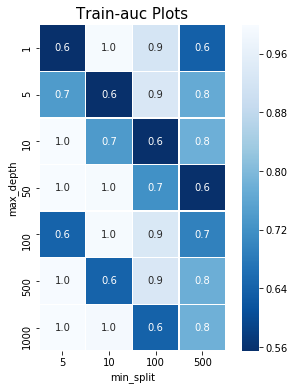

In [76]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','train_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Train-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

#### Plotting CV- AUC heatmap

In [77]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  

df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['cv_auc'] = cv_auc
df.head(5)

,max_depth,min_split,cv_auc
0,1,5,0.552586
1,5,10,0.552586
2,10,100,0.552586
3,50,500,0.552586
4,100,5,0.616455


In [78]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


cv_auc
max_depth min_split          
1         5          0.552586
          10         0.558002
          100        0.585048
          500        0.618091
5         5          0.625429
          10         0.552586
          100        0.582885
          500        0.619086
10        5          0.552339
          10         0.624142

In [79]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,cv_auc
0,1,5,0.552586
1,1,10,0.558002
2,1,100,0.585048
3,1,500,0.618091
4,5,5,0.625429


In [80]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','cv_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.552586,0.558002,0.585048,0.618091
5,0.625429,0.552586,0.582885,0.619086
10,0.552339,0.624142,0.552586,0.616338
50,0.552160,0.560364,0.628056,0.552586
100,0.616455,0.560123,0.582274,0.635994


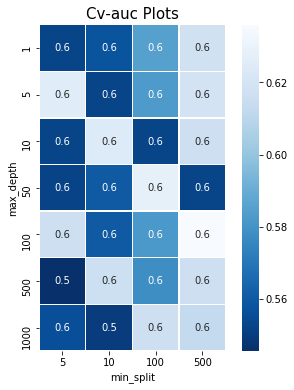

In [81]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','cv_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Cv-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

## Optimal Parameters
min_sample_split = 10 <br>
max_depth = 100

In [82]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

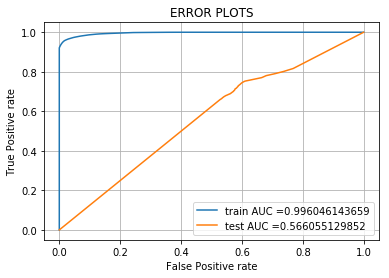

In [83]:
from sklearn.metrics import roc_curve, auc


clf= DecisionTreeClassifier( min_samples_split =10, max_depth=100 , class_weight = 'balanced' )
clf.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X1)    
y_test_pred = batch_predict(clf, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [84]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



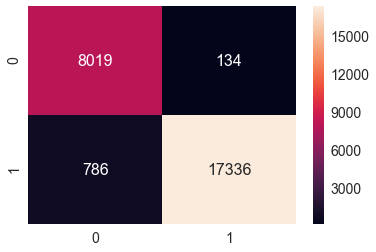

In [85]:
print("="*100)
from sklearn.metrics import confusion_matrix
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = clf.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

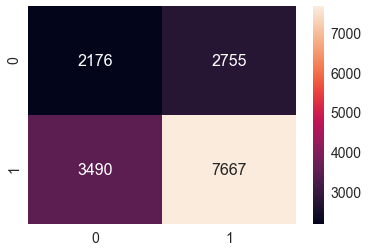

In [86]:
y_pred_new = clf.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [87]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_tfidf_train, title_tfidf_train, prev_projects_train, quantity_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_tfidf_test, title_tfidf_test, prev_projects_test, quantity_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_tfidf_cv, title_tfidf_cv, prev_projects_cv, quantity_cv )).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(26275, 11121) (26275,)
(11261, 11121) (11261,)
(16088, 11121) (16088,)


In [88]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

d_tree = DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]} 
clf = GridSearchCV(d_tree, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 30min 45s


In [89]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  


df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['train_auc'] = train_auc
df.head(5)

,max_depth,min_split,train_auc
0,1,5,0.558537
1,5,10,0.558537
2,10,100,0.558537
3,50,500,0.558537
4,100,5,0.643262


In [90]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


train_auc
max_depth min_split           
1         5           0.558537
          10          0.996516
          100         0.925154
          500         0.640495
5         5           0.746718
          10          0.558537
          100         0.944622
          500         0.822544
10        5           0.999381
          10          0.743483

In [91]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,train_auc
0,1,5,0.558537
1,1,10,0.996516
2,1,100,0.925154
3,1,500,0.640495
4,5,5,0.746718


In [92]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','train_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.558537,0.996516,0.925154,0.640495
5,0.746718,0.558537,0.944622,0.822544
10,0.999381,0.743483,0.558537,0.853168
50,0.999672,0.995959,0.720483,0.558537
100,0.643262,0.996530,0.943187,0.700275


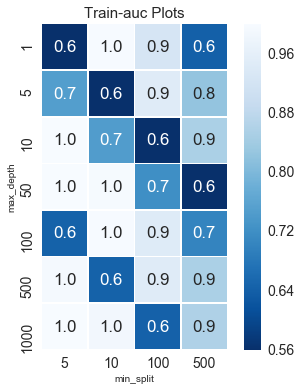

In [93]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','train_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Train-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [94]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  

df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['cv_auc'] = cv_auc
df.head(5)

,max_depth,min_split,cv_auc
0,1,5,0.550419
1,5,10,0.550419
2,10,100,0.550419
3,50,500,0.550419
4,100,5,0.616779


In [95]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


cv_auc
max_depth min_split          
1         5          0.550419
          10         0.557577
          100        0.584048
          500        0.616658
5         5          0.613448
          10         0.550419
          100        0.577151
          500        0.608592
10        5          0.547106
          10         0.615024

In [96]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,cv_auc
0,1,5,0.550419
1,1,10,0.557577
2,1,100,0.584048
3,1,500,0.616658
4,5,5,0.613448


In [97]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','cv_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.550419,0.557577,0.584048,0.616658
5,0.613448,0.550419,0.577151,0.608592
10,0.547106,0.615024,0.550419,0.596415
50,0.554107,0.556596,0.622661,0.550419
100,0.616779,0.559825,0.580182,0.628845


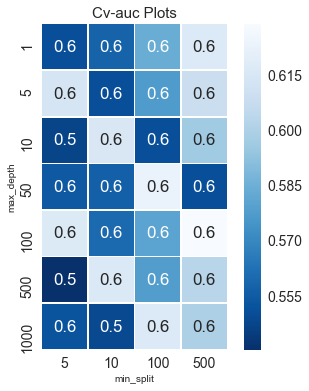

In [98]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','cv_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Cv-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

### Optimal Parameters
min_sample_split = 10  <br>
max_depth = 100

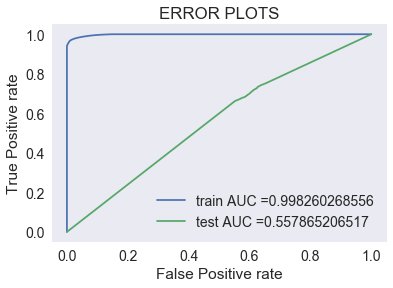

In [99]:
from sklearn.metrics import roc_curve, auc


clf= DecisionTreeClassifier( min_samples_split =10, max_depth=100 , class_weight = 'balanced' )
clf.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X1)    
y_test_pred = batch_predict(clf, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [100]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



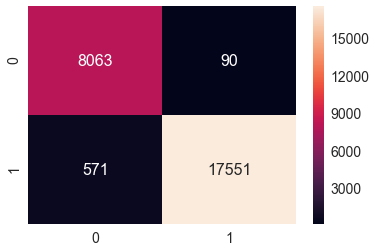

In [101]:
print("="*100)
from sklearn.metrics import confusion_matrix
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = clf.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

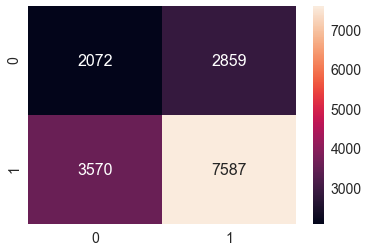

In [102]:
y_pred_new = clf.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [103]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
all_features=[]
all_features.extend(vectorizer1.get_feature_names())
all_features.extend(vectorizer2.get_feature_names())
all_features.extend(vectorizer3.get_feature_names())
all_features.extend(vectorizer4.get_feature_names())
all_features.extend(vectorizer5)
all_features.extend(vectorizer6.get_feature_names())
all_features.extend(vectorizer.get_feature_names())
all_features.append('price')
all_features.append('teacher_number_of_previously_posted_projects')
all_features.append('quantity')

In [104]:
d_tree = DecisionTreeClassifier(max_depth = 3)
clf = d_tree.fit(X1,y_train)

In [105]:
# Visualize data import graphviz 
import graphviz
from sklearn import tree 
from graphviz import Source 
dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=all_features) 
graph = graphviz.Source(dot_data) 
graph.render("Bow tree2",view = True)


'Bow tree2.pdf'

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [106]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, avg_w2v_vectors_train, avg_w2v_vectors_train_title, prev_projects_train, quantity_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, avg_w2v_vectors_test, avg_w2v_vectors_test_title, prev_projects_test, quantity_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, avg_w2v_vectors_cv_title, avg_w2v_vectors_cv, prev_projects_cv, quantity_cv )).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(26275, 703) (26275,)
(11261, 703) (11261,)
(16088, 703) (16088,)


In [107]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

d_tree = DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]} 
clf = GridSearchCV(d_tree, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 5h 26min 28s


In [108]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  


df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['train_auc'] = train_auc
df.head(5)

,max_depth,min_split,train_auc
0,1,5,0.554813
1,5,10,0.554813
2,10,100,0.554813
3,50,500,0.554813
4,100,5,0.650264


In [109]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


train_auc
max_depth min_split           
1         5           0.554813
          10          0.997256
          100         0.896115
          500         0.647328
5         5           0.826516
          10          0.554813
          100         0.895469
          500         0.741271
10        5           0.999773
          10          0.823627

In [110]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,train_auc
0,1,5,0.554813
1,1,10,0.997256
2,1,100,0.896115
3,1,500,0.647328
4,5,5,0.826516


In [111]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','train_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.554813,0.997256,0.896115,0.647328
5,0.826516,0.554813,0.895469,0.741271
10,0.999773,0.823627,0.554813,0.739714
50,0.999773,0.997464,0.767172,0.554813
100,0.650264,0.997294,0.896216,0.706237


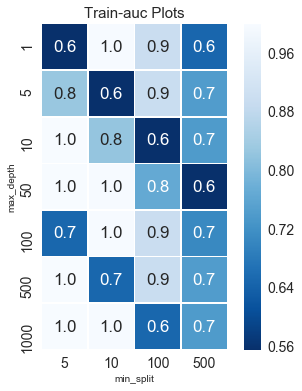

In [112]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','train_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Train-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [113]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  

df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['cv_auc'] = cv_auc
df.head(5)

,max_depth,min_split,cv_auc
0,1,5,0.552586
1,5,10,0.552586
2,10,100,0.552586
3,50,500,0.552586
4,100,5,0.599896


In [114]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


cv_auc
max_depth min_split          
1         5          0.552586
          10         0.537102
          100        0.557462
          500        0.600138
5         5          0.565934
          10         0.552586
          100        0.560271
          500        0.584766
10        5          0.533397
          10         0.564374

In [115]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,cv_auc
0,1,5,0.552586
1,1,10,0.537102
2,1,100,0.557462
3,1,500,0.600138
4,5,5,0.565934


In [116]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','cv_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.552586,0.537102,0.557462,0.600138
5,0.565934,0.552586,0.560271,0.584766
10,0.533397,0.564374,0.552586,0.585969
50,0.533796,0.539262,0.579277,0.552586
100,0.599896,0.537026,0.560834,0.590576


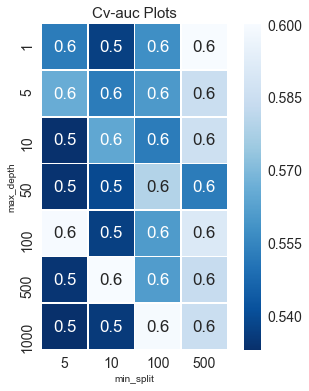

In [117]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','cv_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Cv-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

### Optimal Parameters
min_sample_split = 10 <br>
max_depth = 100

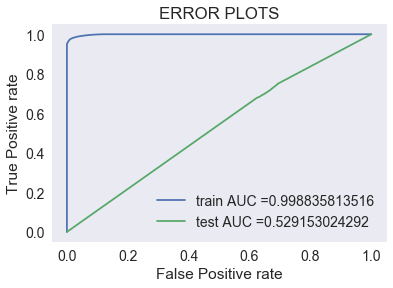

In [118]:
from sklearn.metrics import roc_curve, auc


clf= DecisionTreeClassifier( min_samples_split =10, max_depth=100 , class_weight = 'balanced' )
clf.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X1)    
y_test_pred = batch_predict(clf, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [119]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



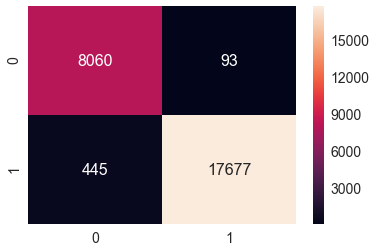

In [120]:
print("="*100)
from sklearn.metrics import confusion_matrix
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = clf.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

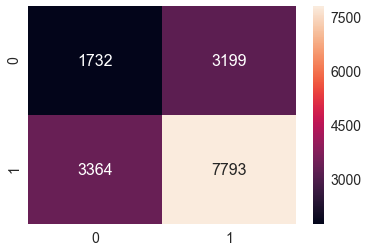

In [121]:
y_pred_new = clf.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [122]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_title_train, prev_projects_train, quantity_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_title_test, prev_projects_test, quantity_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_title_cv, prev_projects_cv, quantity_cv )).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(26275, 703) (26275,)
(11261, 703) (11261,)
(16088, 703) (16088,)


In [123]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

d_tree = DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]} 
clf = GridSearchCV(d_tree, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 1h 10min 39s


In [124]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  


df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['train_auc'] = train_auc
df.head(5)

,max_depth,min_split,train_auc
0,1,5,0.554813
1,5,10,0.554813
2,10,100,0.554813
3,50,500,0.554813
4,100,5,0.648763


In [125]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


train_auc
max_depth min_split           
1         5           0.554813
          10          0.997178
          100         0.886275
          500         0.646506
5         5           0.830748
          10          0.554813
          100         0.887327
          500         0.719713
10        5           0.999761
          10          0.827438

In [126]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,train_auc
0,1,5,0.554813
1,1,10,0.997178
2,1,100,0.886275
3,1,500,0.646506
4,5,5,0.830748


In [127]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','train_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.554813,0.997178,0.886275,0.646506
5,0.830748,0.554813,0.887327,0.719713
10,0.999761,0.827438,0.554813,0.720893
50,0.999749,0.997200,0.768584,0.554813
100,0.648763,0.997165,0.888181,0.701984


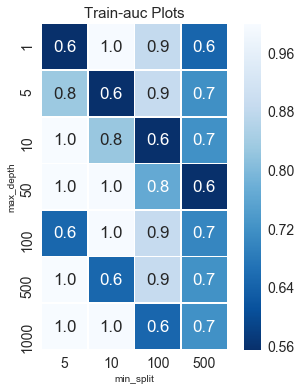

In [128]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','train_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Train-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [129]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  

df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['cv_auc'] = cv_auc
df.head(5)

,max_depth,min_split,cv_auc
0,1,5,0.552586
1,5,10,0.552586
2,10,100,0.552586
3,50,500,0.552586
4,100,5,0.597668


In [130]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


cv_auc
max_depth min_split          
1         5          0.552586
          10         0.538726
          100        0.560137
          500        0.597358
5         5          0.568226
          10         0.552586
          100        0.559343
          500        0.586729
10        5          0.530931
          10         0.564646

In [131]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,cv_auc
0,1,5,0.552586
1,1,10,0.538726
2,1,100,0.560137
3,1,500,0.597358
4,5,5,0.568226


In [132]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','cv_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.552586,0.538726,0.560137,0.597358
5,0.568226,0.552586,0.559343,0.586729
10,0.530931,0.564646,0.552586,0.586272
50,0.527753,0.533992,0.580261,0.552586
100,0.597668,0.534963,0.558365,0.591492


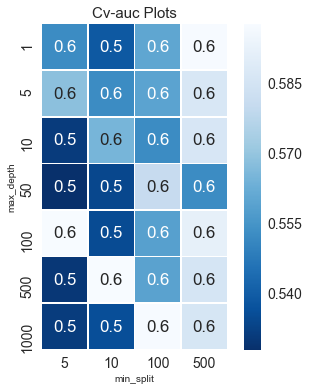

In [133]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','cv_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Cv-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

### Optimal Parameters
min_sample_split = 10 <br>
max_depth = 100

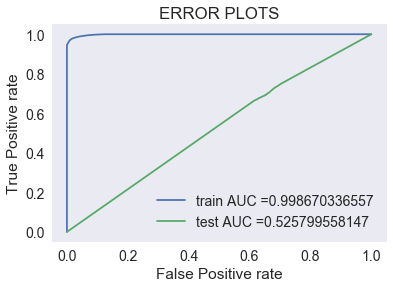

In [134]:
from sklearn.metrics import roc_curve, auc


clf= DecisionTreeClassifier( min_samples_split =10, max_depth=100 , class_weight = 'balanced' )
clf.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X1)    
y_test_pred = batch_predict(clf, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [135]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



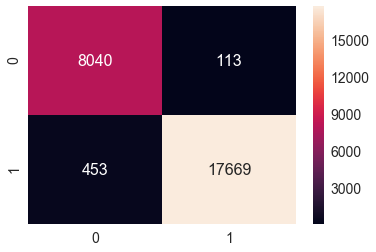

In [136]:
print("="*100)
from sklearn.metrics import confusion_matrix
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = clf.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

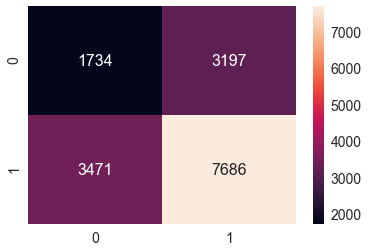

In [137]:
y_pred_new = clf.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [138]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_bow_train, title_bow_train, prev_projects_train, quantity_train))
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_bow_test, title_bow_test, prev_projects_test, quantity_test))
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_bow_cv, title_bow_cv, prev_projects_cv, quantity_cv ))
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(26275, 11121) (26275,)
(11261, 11121) (11261,)
(16088, 11121) (16088,)


In [139]:
X1 = X1.todense()

In [140]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X1,y_train)

In [141]:
#https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees?noredirect=1&lq=1
a = clf.tree_.compute_feature_importances(normalize=False)

In [142]:
prob_class = np.argsort((clf.tree_.compute_feature_importances(normalize=False)))
print(prob_class[:5000])

[   0 7124 7125 ..., 9149 9150 9152]


In [143]:
all_features = []
all_features.extend(vectorizer1.get_feature_names())
all_features.extend(vectorizer2.get_feature_names())
all_features.extend(vectorizer3.get_feature_names())
all_features.extend(vectorizer4.get_feature_names())
all_features.extend(vectorizer5)
all_features.extend(vectorizer6.get_feature_names())
all_features.extend(vectorizer7.get_feature_names())
all_features.append('price')
all_features.append('quantity')
all_features.append('teacher_number_of_previously_posted_projects')

In [144]:
np.take(all_features,prob_class[:5000])

array(['Warmth', 'rank', 'ranked', ..., 'unaware', 'unbelievable',
       'uncertain'],
      dtype='<U44')

In [145]:
df_train = pd.DataFrame(X1)
prob_class = prob_class[:5000]
df_train = df_train.iloc[:, prob_class]
df_train.shape

(26275, 5000)

In [146]:
X2 = X2.todense()
df_test = pd.DataFrame(X2)
df_test = df_test.iloc[:, prob_class]
df_test.shape

(16088, 5000)

In [147]:
X3 = X3.todense()
df_cv = pd.DataFrame(X3)
df_cv = df_cv.iloc[:, prob_class]
df_cv.shape

(11261, 5000)

In [148]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

d_tree = DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]} 
clf = GridSearchCV(d_tree, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(df_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Wall time: 3h 47min 55s


In [149]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  


df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['train_auc'] = train_auc
df.head(5)

,max_depth,min_split,train_auc
0,1,5,0.514220
1,5,10,0.514220
2,10,100,0.514220
3,50,500,0.514220
4,100,5,0.546309


In [150]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


train_auc
max_depth min_split           
1         5           0.514220
          10          0.994131
          100         0.752251
          500         0.543974
5         5           0.579638
          10          0.514220
          100         0.925743
          500         0.664182
10        5           0.895072
          10          0.578919

In [151]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,train_auc
0,1,5,0.514220
1,1,10,0.994131
2,1,100,0.752251
3,1,500,0.543974
4,5,5,0.579638


In [152]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','train_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.514220,0.994131,0.752251,0.543974
5,0.579638,0.514220,0.925743,0.664182
10,0.895072,0.578919,0.514220,0.789136
50,0.998784,0.885265,0.577101,0.514220
100,0.546309,0.994336,0.832243,0.567830


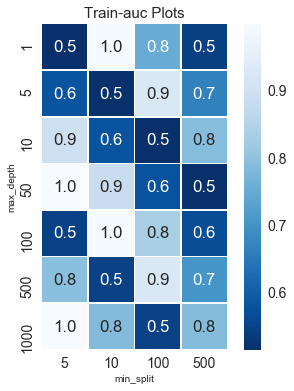

In [153]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','train_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Train-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [154]:
max_depth = [1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000 , 1, 5, 10, 50, 100, 500, 1000, 1, 5, 10, 50, 100, 500, 1000]
min_sample_split = [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500, 5, 10, 100, 500,5, 10, 100, 500]  

df = pd.DataFrame()
df['max_depth'] = max_depth
df['min_split'] = min_sample_split
df['cv_auc'] = cv_auc
df.head(5)

,max_depth,min_split,cv_auc
0,1,5,0.514220
1,5,10,0.514220
2,10,100,0.514220
3,50,500,0.514220
4,100,5,0.534699


In [155]:
phase_1_2 = df.groupby(['max_depth', 'min_split']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(28, 1)


cv_auc
max_depth min_split          
1         5          0.514220
          10         0.540581
          100        0.568761
          500        0.534306
5         5          0.547739
          10         0.514220
          100        0.550742
          500        0.582602
10        5          0.564097
          10         0.547309

In [156]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,max_depth,min_split,cv_auc
0,1,5,0.514220
1,1,10,0.540581
2,1,100,0.568761
3,1,500,0.534306
4,5,5,0.547739


In [157]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('max_depth', 'min_split','cv_auc').head()

min_split,5,10,100,500
max_depth,,,,
1,0.514220,0.540581,0.568761,0.534306
5,0.547739,0.514220,0.550742,0.582602
10,0.564097,0.547309,0.514220,0.572817
50,0.537412,0.561010,0.547187,0.514220
100,0.534699,0.537537,0.563178,0.549884


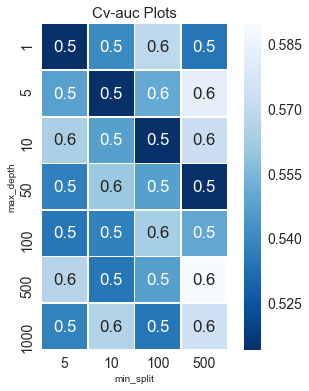

In [158]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('max_depth', 'min_split','cv_auc')
plt.xlabel('max_depth', size = 10)
plt.ylabel('min_split', size = 10)
plt.title('Cv-auc Plots', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

### Optimal Parameters

min_sample_split = 10 <br> 
max_depth = 100

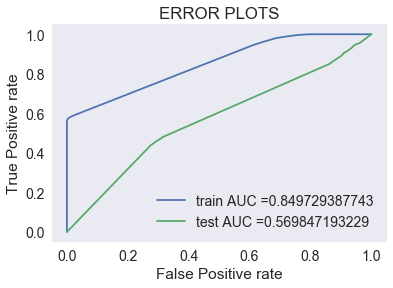

In [160]:
from sklearn.metrics import roc_curve, auc


clf= DecisionTreeClassifier( min_samples_split =10, max_depth=100 , class_weight = 'balanced' )
clf.fit(df_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, df_train)    
y_test_pred = batch_predict(clf, df_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [161]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



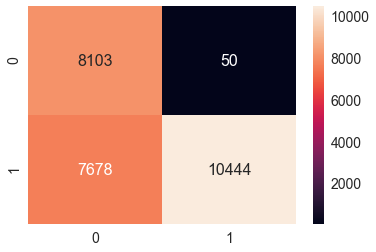

In [163]:
print("="*100)
from sklearn.metrics import confusion_matrix
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = clf.predict(df_train)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

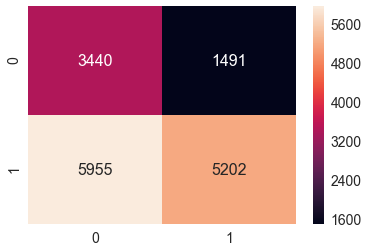

In [164]:
y_pred_new = clf.predict(df_test)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [168]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable 
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable 
x = PrettyTable() 
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Train AUC" , "Test AUC"] 
x.add_row(["BOW", "Decision Trees","(10, 100)", 0.9960, 0.5560]) 
x.add_row(["TFIDF", "Decision Trees", "(10, 100)", 0.9982, 0.615]) 
x.add_row(["AVG W2V", "Decision Trees", "(10, 100)", 0.988, 0.602]) 
x.add_row(["TFIDF W2V", "Decision Trees", "(10, 100)", 0.9986, 0.5257]) 
x.add_row(["BOW-5k Features", "Linear SVM", "[L1 penalty, alpha = 0.00009]", 0.8497, 0.5698])
print(x)

+-----------------+----------------+----------------------------------------------+-----------+----------+
|    Vectorizer   |     Model      | Hyperparameters(max depth,min samples split) | Train AUC | Test AUC |
+-----------------+----------------+----------------------------------------------+-----------+----------+
|       BOW       | Decision Trees |                  (10, 100)                   |   0.996   |  0.556   |
|      TFIDF      | Decision Trees |                  (10, 100)                   |   0.9982  |  0.615   |
|     AVG W2V     | Decision Trees |                  (10, 100)                   |   0.988   |  0.602   |
|    TFIDF W2V    | Decision Trees |                  (10, 100)                   |   0.9986  |  0.5257  |
| BOW-5k Features |   Linear SVM   |        [L1 penalty, alpha = 0.00009]         |   0.8497  |  0.5698  |
+-----------------+----------------+----------------------------------------------+-----------+----------+
